In [90]:
import pandas as pd
import numpy as np
import os
import urllib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [79]:
#importing the data
TITANIC_PATH = os.path.join("datasets", "titanic")
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
train_data.info()
#Age, cabin and Embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
#filling missing age with mean
train_data["Age"]=train_data["Age"].fillna(28.0)

In [55]:
#filling missing data with the most common
train_data["Embarked"]=train_data["Embarked"].fillna("S")

In [119]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
#fill empty numerical values with its median
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["AgeBucket", "RelativesOnboard", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])
num_pipeline.fit_transform(train_data)


array([[-1.5   ,  1.    ,  7.25  ],
       [-0.5   ,  1.    , 71.2833],
       [-1.5   ,  0.    ,  7.925 ],
       ...,
       [-1.5   ,  3.    , 23.45  ],
       [-1.5   ,  0.    , 30.    ],
       [-0.5   ,  0.    ,  7.75  ]])

In [59]:
#fill empty classes with the most common one
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
#fill empty classes with the most common one and transform the string data into numerical data
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [120]:
#gathering the numerical pipeline with the categorical one
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [121]:
y_train = train_data["Survived"] #LABELS
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-1.5   ,  1.    ,  7.25  , ...,  0.    ,  0.    ,  1.    ],
       [-0.5   ,  1.    , 71.2833, ...,  1.    ,  0.    ,  0.    ],
       [-1.5   ,  0.    ,  7.925 , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [-1.5   ,  3.    , 23.45  , ...,  0.    ,  0.    ,  1.    ],
       [-1.5   ,  0.    , 30.    , ...,  1.    ,  0.    ,  0.    ],
       [-0.5   ,  0.    ,  7.75  , ...,  0.    ,  1.    ,  0.    ]])

In [122]:
#Training with the SVC Classifier 
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)
y_svm = svm_clf.predict(X_train)
print(accuracy_score(y_train, y_svm))
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8383838383838383


0.7856554307116105

In [123]:
#Training the KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier(n_neighbors=8, weights='distance')
kn_clf.fit(X_train,y_train)
y_kn = kn_clf.predict(X_train)
print(accuracy_score(y_train, y_kn))
kn_scores = cross_val_score(kn_clf, X_train, y_train, cv=10)
kn_scores.mean()

0.9438832772166106


0.7946566791510612

In [141]:
#Training a Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy', n_jobs = -1, verbose=0)
forest_clf.fit(X_train, y_train)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean() #Best result so far

0.8126342072409487

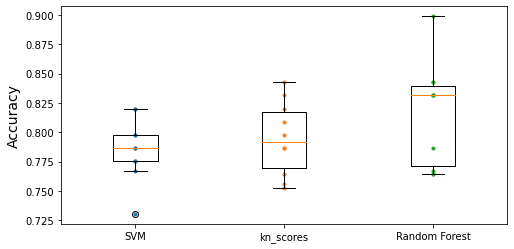

In [129]:
#Comparing Results
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, kn_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.boxplot([svm_scores, kn_scores, forest_scores], labels=("SVM", "kn_scores", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [118]:
# Modifing the data further 
train_data["AgeBucket"] = train_data["Age"] // 15 -2.5
print(train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()) #Splitting the age into categories
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean() #Accounting for all relatives

           Survived
AgeBucket          
-2.5       0.576923
-1.5       0.362745
-0.5       0.423256
 0.5       0.404494
 1.5       0.240000
 2.5       1.000000


,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [138]:
test_data["AgeBucket"] = test_data["Age"] // 15 -2.5
test_data["RelativesOnboard"] = test_data["SibSp"] + test_data["Parch"]
X_test = preprocess_pipeline.fit_transform(test_data)

In [177]:
resultsnp = np.array([test_data["PassengerId"],forest_clf.predict(X_test)])
resultpd = pd.DataFrame(resultsnp)
resultpd = resultpd.T
resultpd.reset_index(drop=True, inplace=True)
resultpd.columns = ["PassengerId", "Survived"]
resultpd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [178]:
resultpd.to_csv(r'C:\Users\rgwes\datasets\titanic\results.csv', index = False)